# Logistic Regression with Python

#### Importing the neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline

#### Loading the dataset

In [2]:
Data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv")

In [3]:
Data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
yd = np.asarray(Data.loc[:,"churn"].astype("int"))
xd = np.asarray(Data.loc[:,['age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless']])

In [5]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts( xd, yd, test_size = 0.3, random_state = 4)
print ('Train set:', xtrain.shape,  ytrain.shape)
print ('Test set:', xtest.shape, ytest.shape)

Train set: (140, 8) (140,)
Test set: (60, 8) (60,)


In [6]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
LinearRg = LR( C = 0.01, solver = "liblinear").fit(xtrain, ytrain)
yhat = LinearRg.predict(xtest)

In [7]:
yhat_prob = LinearRg.predict_proba(xtest)

#  Model Evalution

#### Jaccard

In [8]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(ytest,yhat )

0.7166666666666667

#### Confusion Matrix

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(ytest, yhat, labels=[1,0]))

[[ 1 16]
 [ 1 42]]


Confusion matrix, without normalization
[[ 1 16]
 [ 1 42]]


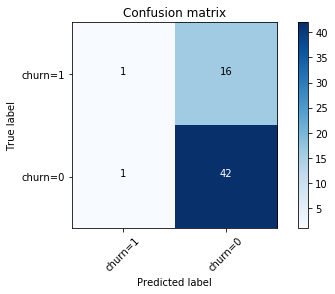

In [10]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [11]:
print (classification_report(ytest, yhat))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83        43
           1       0.50      0.06      0.11        17

   micro avg       0.72      0.72      0.72        60
   macro avg       0.61      0.52      0.47        60
weighted avg       0.66      0.72      0.63        60



In [12]:
from sklearn.metrics import log_loss
log_loss(ytest, yhat_prob)

0.48361994153799714